# (연구&교수님) EBT – 첫 논문 재현

신록예찬  
2024-01-16

# Options

In [1]:
options(jupyter.plot_scale=4)
options(repr.plot.width=6,repr.plot.height=4,repr.plot.res=300)

# Imports

In [2]:
getwd()

'/home/cgb2/Dropbox/03_yechan3/연구/규빈/EBT'

In [3]:
source("EBT.R")

In [4]:
library(devtools)
install_github("seoyeonc/gglite",force=TRUE)
library(tidyverse)
library(gglite)
library(ggplot2)
library(patchwork)


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpKWgCC5/remotes28504a1c0d3d49/seoyeonc-gglite-0efc8be/DESCRIPTION’ ... OK
* preparing ‘gglite’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘gglite_0.1.0.tar.gz’


# Example

In [5]:
fs=1000
t=-2000:2000/fs
v1=sin(2*pi*t)
v2=cos(20*pi*t)
f=v1*v2

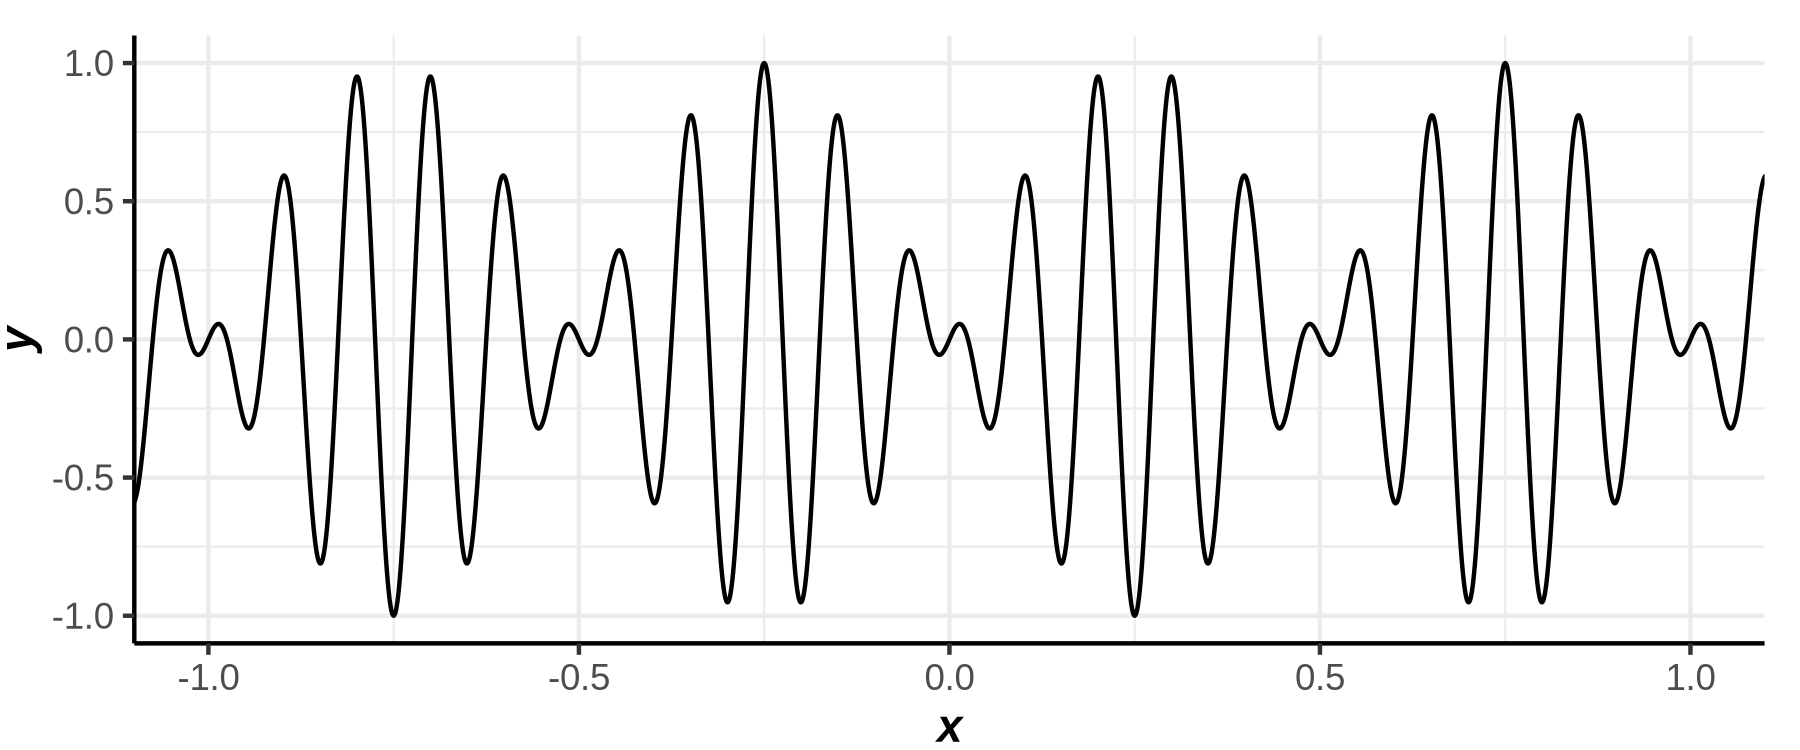

In [6]:
figsize(6,2.5)
gglite()+line(t,f)+coord_cartesian(xlim=c(-1,1))

In [7]:
ebt1<-ebt(f,t,tau=60)
s1<-ebt1$sampled_index[[1]]
s2<-ebt1$sampled_index[[20]]
s3<-ebt1$sampled_index[[40]]
ebt2<-ebt(f,t,tau=80)
s4<-ebt2$sampled_index[[1]]
s5<-ebt2$sampled_index[[20]]
s6<-ebt2$sampled_index[[40]]

In [8]:
fig1a = gglite()+ point(t,f,col="gray60",cex=0.1)

In [9]:
fig1b = fig1a +
point(t[s1],ebt1$band[,1][s1],cex=2,col=2)+ # band1, point
line(t[s1],ebt1$band[,1][s1],col=2,alpha=0.2,lwd=1)+ # band1, line 
point(t[s2],ebt1$band[,20][s2],cex=2,col=4)+ # band20, point 
line(t[s2],ebt1$band[,20][s2],col=4,alpha=0.2,lwd=1)+ # band20, line
point(t[s3],ebt1$band[,40][s3],cex=2,col=3)+ # band40, point
line(t[s3],ebt1$band[,40][s3],col=3,alpha=0.2,lwd=1)+ # band40, line
ggtitle("(b)")+
coord_cartesian(xlim=c(-0.22,0.22))

In [10]:
fig1c = fig1a + 
point(t[s4],ebt2$band[,1][s4],cex=2,col=2)+ # band1, point
line(t[s4],ebt2$band[,1][s4],col=2,alpha=0.2,lwd=1)+ # band1, line 
point(t[s5],ebt2$band[,20][s5],cex=2,col=4)+ # band20, point 
line(t[s5],ebt2$band[,20][s5],col=4,alpha=0.2,lwd=1)+ # band20, line
point(t[s6],ebt2$band[,40][s6],cex=2,col=3)+ # band40, point
line(t[s6],ebt2$band[,40][s6],col=3,alpha=0.2,lwd=1)+ # band40, line
ggtitle("(c)")+
coord_cartesian(xlim=c(-0.22,0.22))

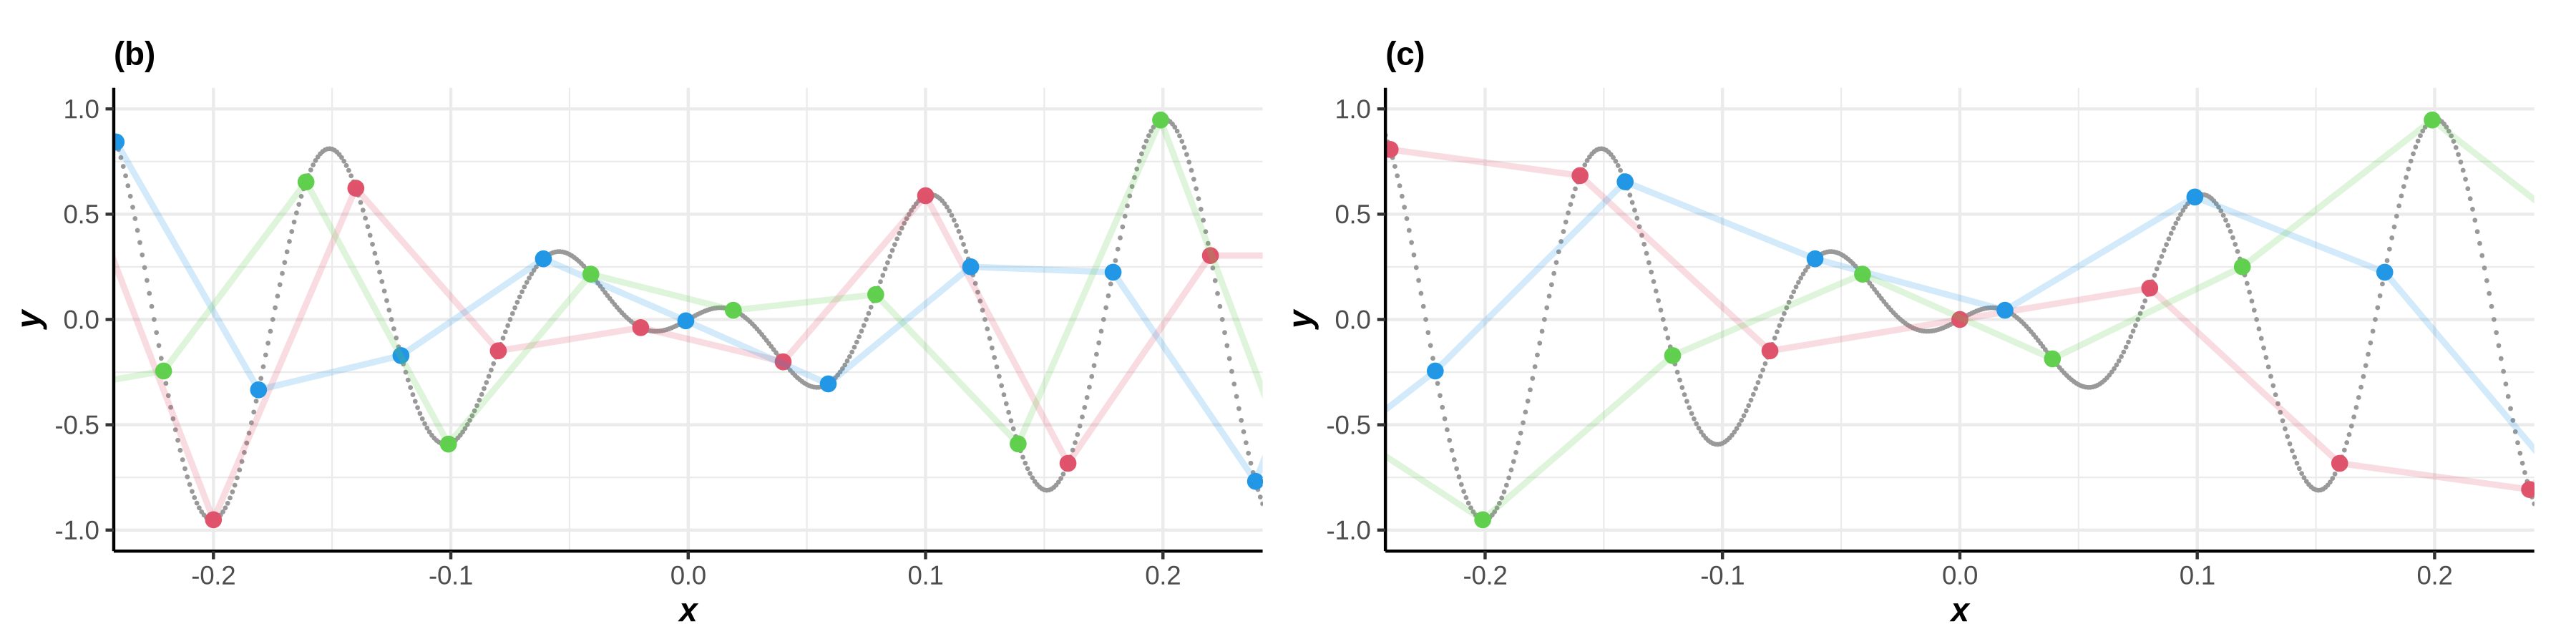

In [11]:
figsize(12,3)
fig1b|fig1c
figsize()

In [12]:
fig1d <- fig1b
fig1e <- fig1c

In [13]:
for(i in 1:60){
    fig1d <- fig1d + line(ebt1$t,ebt1$band[,i],col="gray60",lwd=0.05) + ggtitle("(d)")
}

In [14]:
for(i in 1:80){
    fig1e <- fig1e + line(ebt2$t,ebt2$band[,i],col="gray60",lwd=0.05) + ggtitle("(e)")
}

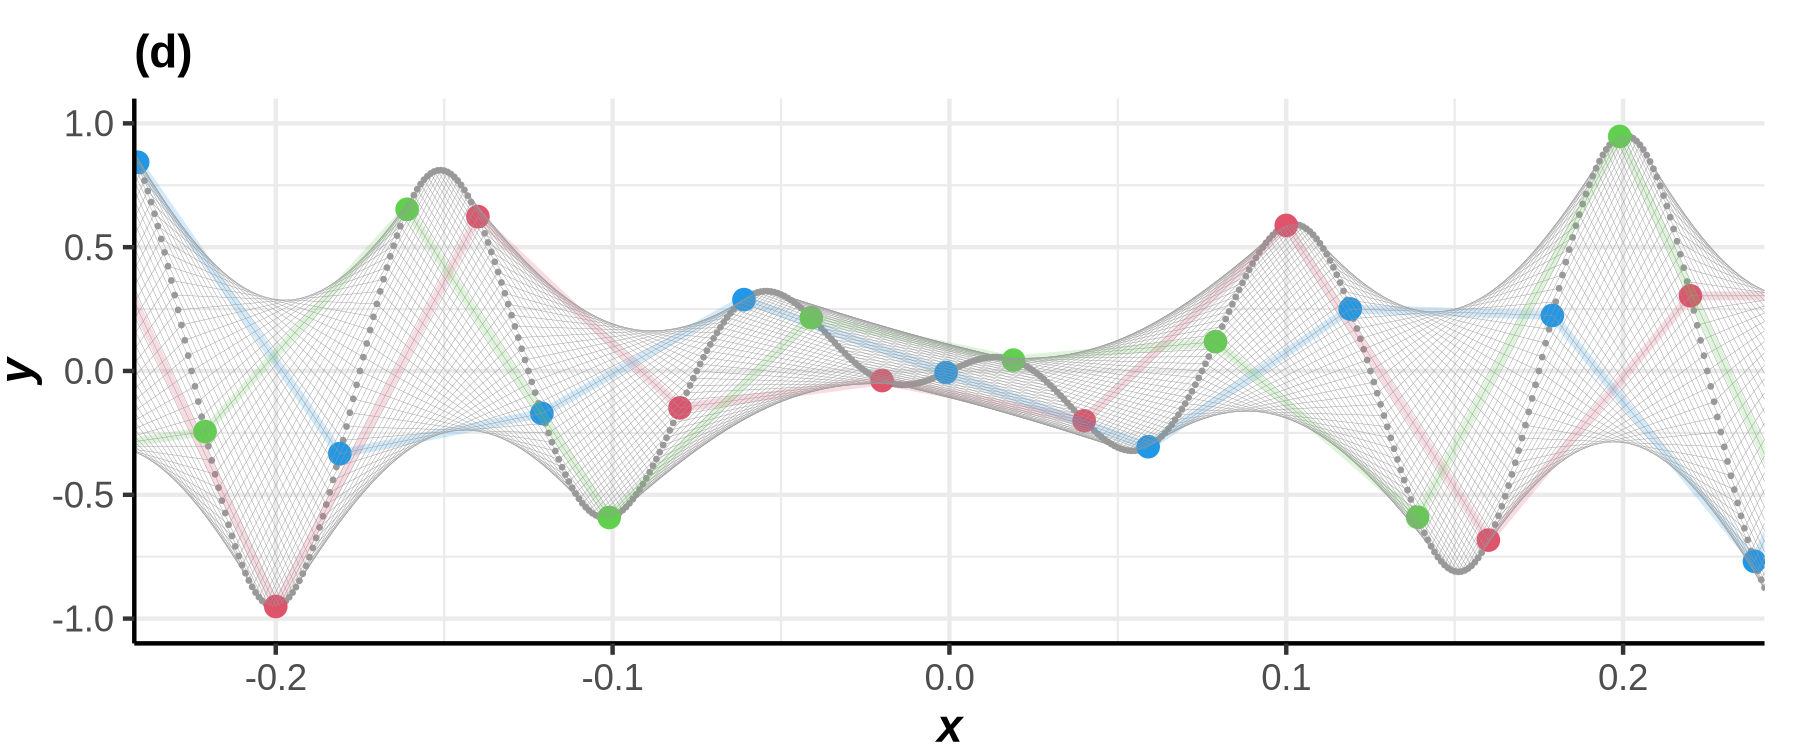

In [15]:
fig1d

In [17]:
# # Load VMD R function
# source("functions.R")
# #PATH<-"C:/Users/gbchoi/Desktop/Dropbox/000. Statistics/_PAPERANDTALK/Elastic band/Paper/"

# #########################################################################################################################################
# # INTRODUCTION
# #########################################################################################################################################
# ## FIG 1  
# cex=0.1
# fs=1000
# t=-2000:2000/fs
# v1=sin(2*pi*t)
# v2=cos(20*pi*t)
# f=v1*v2;
# ebt1<-ebt(f,t,tau=60)
# s1<-ebt1$sampled.index[[1]]
# s2<-ebt1$sampled.index[[20]]
# s3<-ebt1$sampled.index[[40]]

# ebt2<-ebt(f,t,tau=100)
# s4<-ebt2$sampled.index[[1]]
# s5<-ebt2$sampled.index[[20]]
# s6<-ebt2$sampled.index[[40]]


# #pdf(paste(PATH, "1]Introduction_fig1.pdf", sep=""), width=7, height=7)
# par(mfrow=c(3,2))
# par(mar=c(2.5,2.5,2.5,2.5))
# plot(t,f,xlim=c(t[1800],t[2200]),xlab="",ylab="",ylim=c(-1,1),lwd=1,main="(a)",col="gray60",cex=cex)
# plot(t,f,xlim=c(t[1800],t[2200]),xlab="",ylab="",ylim=c(-1,1),lwd=1,main="(b)",col="gray60",cex=cex)
# points(t[s1],ebt1$band[,1][s1],cex=1,col=2,pch=19)
# lines(t[s1],ebt1$band[,1][s1],lwd=2,col=2)

# #vis(ebt(f,t,tau=60),M=F,V=F,band=c(1,20,40),xlim=c(t[1800],t[2200]),ylim=c(-1,1),obs="lines",bandlwd=1,main="(c)")
# plot(t,f,xlim=c(t[1500],t[2500]),xlab="",ylab="",ylim=c(-1,1),lwd=1,main="(c)",col="gray60",cex=cex)
# points(t[s1],ebt1$band[,1][s1],cex=0.7,col=2,pch=19)
# lines(t[s1],ebt1$band[,1][s1],lwd=1,col=2)
# points(t[s2],ebt1$band[,20][s2],cex=0.7,col=4,pch=19)
# lines(t[s2],ebt1$band[,20][s2],lwd=1,col=4)
# points(t[s3],ebt1$band[,40][s3],cex=0.7,col=3,pch=19)
# lines(t[s3],ebt1$band[,40][s3],lwd=1,col=3)

# vis(ebt(f,t,tau=60),M=F,V=F,xlim=c(t[1500],t[2500]),band=1:60,ylim=c(-1,1),obs="lines",bandlwd=0.5,main="(d)")
# plot(t,f,xlim=c(t[1500],t[2500]),xlab="",ylab="",ylim=c(-1,1),lwd=1,main="(e)",col="gray60",cex=cex)
# points(t[s4],ebt2$band[,1][s4],cex=0.7,col=2,pch=19)
# lines(t[s4],ebt2$band[,1][s4],lwd=1,col=2)
# points(t[s5],ebt2$band[,20][s5],cex=0.7,col=4,pch=19)
# lines(t[s5],ebt2$band[,20][s5],lwd=1,col=4)
# points(t[s6],ebt2$band[,40][s6],cex=0.7,col=3,pch=19)
# lines(t[s6],ebt2$band[,40][s6],lwd=1,col=3)

# vis(ebt(f,t,tau=100),M=F,V=F,xlim=c(t[1500],t[2500]),band=1:100,ylim=c(-1,1),obs="lines",bandlwd=0.5,main="(f)")
# lines(t,v1,col=2,lty=2,lwd=2)
# #dev.off() 

In [ ]:
# #########################################################################################################################################
# # ELASTIC BAND TRANSFORM
# ## Definition of Elastic-Band Transform
# #########################################################################################################################################
# # FIG 1
# cex=1
# cex2=1.4
# fs=10
# t=-30:30/fs
# v1=cos(pi*t^2)
# f=v1; #rf=cos(2*pi*-2000:2000/1000);
# ebt1<-ebt(f,t,tau=3)
# s1<-ebt1$sampled.index[[1]]
# s2<-ebt1$sampled.index[[2]]
# s3<-ebt1$sampled.index[[3]]

# #pdf(paste(PATH, "2-1]defebt1.pdf", sep=""), width=7, height=4)
# par(mar=c(2.5,2.5,2.5,2.5))
# par(mfrow=c(3,2))
# plot(t,f,ylim=c(-1.2,1.2),xlim=c(0,2),cex=cex,col="gray60",xlab="",ylab="",main="(a)")
# plot(t,f,ylim=c(-1.2,1.2),xlim=c(0,2),cex=cex,pch=1,col="gray60",xlab="",ylab="",main="(b)")
# points(t[s2],ebt1$band[,2][s2],ylim=c(-2,2),xlim=c(0,2),cex=cex2,col=2,pch=19)
# plot(t,f,ylim=c(-1.2,1.2),xlim=c(0,2),cex=cex,col="gray60",xlab="",ylab="",main="(c)")
# points(t[s2],ebt1$band[,2][s2],ylim=c(-2,2),xlim=c(0,2),cex=cex2,col=2,pch=19)
# lines(t[s2],ebt1$band[,2][s2],ylim=c(-2,2),xlim=c(0,2),lwd=2,col=2)
# plot(t,f,ylim=c(-1.2,1.2),xlim=c(0,2),cex=cex,col="gray60",xlab="",ylab="",main="(d)")
# points(t[s2],ebt1$band[,2][s2],ylim=c(-2,2),xlim=c(0,2),cex=cex2,col=2,pch=19)
# lines(t[s2],ebt1$band[,2][s2],ylim=c(-2,2),xlim=c(0,2),lwd=2,col=2)
# points(t,ebt1$band[,2],ylim=c(-2,2),xlim=c(0,2),cex=cex2,col=2,pch=19)


# plot(t,f,ylim=c(-1.2,1.2),xlim=c(0,2),cex=cex,col="gray60",xlab="",ylab="",main="(e)")
# points(t[s3],ebt1$band[,3][s3],ylim=c(-2,2),xlim=c(0,2),cex=cex,col=3,pch=19)
# lines(t[s3],ebt1$band[,3][s3],ylim=c(-2,2),xlim=c(0,2),lwd=2,col=3)
# points(t,ebt1$band[,3],ylim=c(-2,2),xlim=c(0,2),cex=cex2,col=3,pch=19)
# plot(t,f,ylim=c(-1.2,1.2),xlim=c(0,2),cex=cex,col="gray60",xlab="",ylab="",main="(f)")
# points(t[s1],ebt1$band[,1][s1],ylim=c(-2,2),xlim=c(0,2),cex=cex2,col=4,pch=19)
# lines(t[s1],ebt1$band[,1][s1],ylim=c(-2,2),xlim=c(0,2),lwd=2,col=4)
# points(t,ebt1$band[,1],ylim=c(-2,2),xlim=c(0,2),cex=cex2,col=4,pch=19)
# #dev.off() 

# # FIG 2
# cex=1
# cex2=1.4
# fs=10
# t=-30:30/fs
# v1=cos(pi*t^2)
# f=v1; rf=cos(2*pi*-2000:2000/1000);
# ebt1<-ebt(f,t,tau=3,interpolation="cubic")
# s1<-ebt1$sampled.index[[1]]
# s2<-ebt1$sampled.index[[2]]
# s3<-ebt1$sampled.index[[3]]

# #pdf(paste(PATH, "2-1]defebt2.pdf", sep=""), width=7, height=4)
# par(mar=c(2.5,2.5,2.5,2.5))
# par(mfrow=c(3,2))
# plot(t,f,ylim=c(-1.2,1.2),xlim=c(0,2),cex=cex,col="gray60",xlab="",ylab="",main="(a)")
# plot(t,f,ylim=c(-1.2,1.2),xlim=c(0,2),cex=cex,pch=1,col="gray60",xlab="",ylab="",main="(b)")
# points(t[s2],ebt1$band[,2][s2],ylim=c(-2,2),xlim=c(0,2),cex=cex2,col=2,pch=19)
# plot(t,f,ylim=c(-1.2,1.2),xlim=c(0,2),cex=cex,col="gray60",xlab="",ylab="",main="(c)")
# points(t[s2],ebt1$band[,2][s2],ylim=c(-2,2),xlim=c(0,2),cex=cex2,col=2,pch=19)
# lines(t,ebt1$band[,2],ylim=c(-2,2),xlim=c(0,2),lwd=2,col=2)
# plot(t,f,ylim=c(-1.2,1.2),xlim=c(0,2),cex=cex,col="gray60",xlab="",ylab="",main="(d)")
# points(t[s2],ebt1$band[,2][s2],ylim=c(-2,2),xlim=c(0,2),cex=cex2,col=2,pch=19)
# lines(t,ebt1$band[,2],ylim=c(-2,2),xlim=c(0,2),lwd=2,col=2)
# points(t,ebt1$band[,2],ylim=c(-2,2),xlim=c(0,2),cex=cex2,col=2,pch=19)
# plot(t,f,ylim=c(-1.2,1.2),xlim=c(0,2),cex=cex,col="gray60",xlab="",ylab="",main="(e)")
# points(t[s3],ebt1$band[,3][s3],ylim=c(-2,2),xlim=c(0,2),cex=cex2,col=3,pch=19)
# lines(t,ebt1$band[,3],ylim=c(-2,2),xlim=c(0,2),lwd=2,col=3)
# points(t,ebt1$band[,3],ylim=c(-2,2),xlim=c(0,2),cex=cex2,col=3,pch=19)
# plot(t,f,ylim=c(-1.2,1.2),xlim=c(0,2),cex=cex,col="gray60",xlab="",ylab="",main="(f)")
# points(t[s1],ebt1$band[,1][s1],ylim=c(-2,2),xlim=c(0,2),cex=cex2,col=4,pch=19)
# lines(t,ebt1$band[,1],ylim=c(-2,2),xlim=c(0,2),lwd=2,col=4)
# points(t,ebt1$band[,1],ylim=c(-2,2),xlim=c(0,2),cex=cex2,col=4,pch=19)
# #dev.off() 

# #########################################################################################################################################
# # ELASTIC BAND TRANSFORM
# ## Sattistics of Elastic-Bands
# #########################################################################################################################################
# # FIG 1
# fs=100
# t=-200:200/fs
# v1=cos(2*pi*t)
# v2=cos(3*pi*t)
# f=v1+v2
# tau=30
# ebt1<-ebt(f,t,tau=tau)
# tau=40
# ebt2<-ebt(f,t,tau=tau)
# tau=50
# ebt3<-ebt(f,t,tau=tau)

# #pdf(paste(PATH, "2-2]multiscale_MandV.pdf", sep=""), width=6, height=4)
# par(mfrow=c(3,2))
# par(mar=c(2.5,2.5,2.5,2.5))
# plot(t,f,lwd=2,xlim=c(-1,1),ylim=c(-3,3),xlab="",ylab="",type='l',main="(a)")
# vis(ebt1,M=F,V=F,band=1:30,xlim=c(-1,1),ylim=c(-3,3),obs=F,main="(b)")
# vis(ebt2,M=F,V=F,band=1:40,xlim=c(-1,1),ylim=c(-3,3),obs=F,main="(c)")
# vis(ebt3,M=F,V=F,band=1:50,xlim=c(-1,1),ylim=c(-3,3),obs=F,main="(d)")
# plot(t,ebt1$M,xlim=c(-1,1),ylim=c(-3,3),type='l',col=2,xlab="",ylab="",lwd=2,main="(e)")
# lines(t,ebt2$M,col=3,lwd=2)
# lines(t,ebt3$M,col=4,lwd=2)
# plot(t,ebt1$V,xlim=c(-1,1),ylim=c(0,1.5),type='l',col=2,xlab="",ylab="",lwd=2,main="(f)")
# lines(t,ebt2$V,col=3,lwd=2)
# lines(t,ebt3$V,col=4,lwd=2)
# dev.off() 

# # FIG 2
# len=500
# tau<-5
# h<-c(rep(0,len-(tau-1)),1:tau,(tau-1):1,rep(0,len-tau))/tau^2
# omega_hat<-seq(from=-pi,to=pi,len=len*2)
# #pdf(paste(PATH, "2-2]Homega.pdf", sep=""), width=7, height=3)
# par(mar=c(2.5,2.5,2.5,2.5))
# par(mfrow=c(1,3))
# plot(omega_hat,c(abs(fft(h))[501:1000],abs(fft(h))[1:500]),type='l',xlab="",ylab="",main="(a)")
# tau<-10
# h<-c(rep(0,len-(tau-1)),1:tau,(tau-1):1,rep(0,len-tau))/tau^2
# omega_hat<-seq(from=-pi,to=pi,len=len*2)
# plot(omega_hat,c(abs(fft(h))[501:1000],abs(fft(h))[1:500]),type='l',xlab="",ylab="",main="(b)")
# tau<-30
# h<-c(rep(0,len-(tau-1)),1:tau,(tau-1):1,rep(0,len-tau))/tau^2
# omega_hat<-seq(from=-pi,to=pi,len=len*2)
# plot(omega_hat,c(abs(fft(h))[501:1000],abs(fft(h))[1:500]),type='l',xlab="",ylab="",main="(c)")
# #dev.off()

# #########################################################################################################################################
# # ELASTIC BAND TRANSFORM
# ## Visualization
# #########################################################################################################################################
# # FIG 1
# set.seed(100)
# v1<-rnorm(150,mean=0,sd=0.5) # ~150
# v2<-rnorm(150,mean=0,sd=0.5) # ~300
# v3<-rnorm(150,mean=1.5,sd=3) # ~450
# v4<-rnorm(150,mean=1.5,sd=3) # ~600
# v5<-rnorm(150,mean=1.5,sd=2) # ~750
# v6<-rnorm(150,mean=1.5,sd=1) # ~900
# v7<-rnorm(150,mean=3.0,sd=1) # ~1050
# v8<-rnorm(150,mean=4.5,sd=1) # ~1200
# v9<-rnorm(150,mean=6.0,sd=1) # ~1350
# v10<-rnorm(150,mean=7.5,sd=1) # ~1500
# f<-c(v1,v2,v3,v4,v5,v6,v7,v8,v9,v10) 
# maxtau=200
# len<-length(f)

# MM1<-Mmap(f,maxtau=maxtau,M="mean",V="var")
# VM1<-Vmap(f,maxtau=maxtau,M="mean",V="var")
# dMM1_t<-diff(MM1)
# dVM1_t<-diff(VM1)

# library(fields)
# #pdf(paste(PATH, "2-3]MmapVmap.pdf", sep=""), width=7, height=5)
# par(mar=c(2.5,3,3,4))
# par(mfrow=c(3,2))
# plot(f,xlab="",ylab="",main="(a)",type='l')
# par(mar=c(2.5,3,3,1))
# mintau<-10
# maxtau<-200
# image.plot(x=1:len,y=mintau:maxtau,z=MM1[1:len,mintau:maxtau],xlab="",ylab="",main="(b)")
# abline(v=c(300,900,1050,1200,1350),lty=2,lwd=1)
# par(mar=c(2.5,2.5,2.5,1))
# mintau<-50
# maxtau<-100
# image.plot(x=1:len,y=mintau:maxtau,z=dMM1_t[1:(len-1),mintau:maxtau],xlab="",ylab="",main="(c)")
# abline(v=c(300,900,1050,1200,1350),lty=2,lwd=1)
# par(mar=c(2.5,2.5,2.5,1))
# mintau<-50
# maxtau<-200
# image.plot(x=1:len,y=mintau:maxtau,z=VM1[1:len,mintau:maxtau],xlab="",ylab="",main="(d)")
# abline(v=c(300,600,750),lty=2,lwd=1)
# mintau<-50
# maxtau<-200
# image.plot(x=1:len,y=mintau:maxtau,z=abs(dVM1_t[1:(len-1),mintau:maxtau]),xlab="",ylab="",main="(e)")
# abline(v=c(300,600,750),lty=2,lwd=1)
# par(mar=c(2.5,2.5,2.5,1))
# mintau<-100
# maxtau<-200
# image.plot(x=1:len,y=mintau:maxtau,z=dMM1_t[1:(len-1),mintau:maxtau],xlab="",ylab="",main="(f)")
# abline(v=c(300,900,1050,1200,1350),lty=2,lwd=1)
# #dev.off() 

# # FIG 2
# library(wavelets)
# data(ecg)
# f<-as.vector(ecg)
# t<-seq(0,11.37,length=2048)
# maxtau=180
# len<-length(f)
# MM2<-Mmap(f,maxtau=maxtau,M="mean",V="var")
# VM2<-Vmap(f,maxtau=maxtau,M="mean",V="var")
# dMM2_t<-diff(MM1)
# dMM2_tau<-t(diff(t(MM2)))
# dVM2_t<-diff(VM2)
# dVM2_tau<-t(diff(t(VM2)))
# # 
# # #pdf(paste(PATH, "2-3]MmapVmapECG.pdf", sep=""), width=7, height=5)
# # par(mfrow=c(3,2))
# # par(mar=c(2.5,2.5,2.5,4))
# # plot(t,f,xlab="",ylab="",main="(a)",type='l')
# # 
# # par(mar=c(2.5,2.5,2.5,1))
# # mintau<-5
# # maxtau<-180
# # image.plot(x=t,y=mintau:maxtau,z=MM2[1:len,mintau:maxtau],xlab="",ylab="",main="(b)",legend.mar=10)
# # mintau<-50
# # maxtau<-175
# # par(mar=c(2.5,2.5,2.5,1))
# # image.plot(x=t,y=mintau:maxtau,z=VM2[1:len,mintau:maxtau],xlab="",ylab="",main="(c)",legend.mar=5)
# # par(mar=c(2.5,2.5,2.5,1))
# # mintau<-50
# # maxtau<-100
# # image.plot(x=t,y=mintau:maxtau,z=dVM2_t[1:(len-1),mintau:maxtau],xlab="",ylab="",main="(d)",legend.mar=10)
# # par(mar=c(2.5,2.5,2.5,1))
# # mintau<-50
# # maxtau<-175
# # image.plot(x=t,y=mintau:maxtau,z=dVM2_tau[1:len,mintau:maxtau],xlab="",ylab="",main="(e)",legend.mar=5)
# # library(phonTools)
# # library(fields)
# # temp<-spectrogram(f,fs=180,windowlength = 5*22050/180,show=F)$spectrogram
# # par(mar=c(2.5,2.5,2.5,1))
# # image.plot(x=seq(0,11.37,length=941),y=seq(0,90,length=617),z=temp[1:941,1:617],xlab="",ylab="",main="(f)",legend.mar=10)
# # #dev.off() 
# # 


# pdf(paste("MmapVmapECG.png", sep=""), width=7, height=5*2/3)
# par(mfrow=c(2,2))
# par(mar=c(2.5,2.5,2.5,4))
# plot(t,f,xlab="",ylab="",main="(a)",type='l')

# par(mar=c(2.5,2.5,2.5,1))
# mintau<-5
# maxtau<-180
# image.plot(x=t,y=mintau:maxtau,z=MM2[1:len,mintau:maxtau],xlab="",ylab="",main="(b)",legend.mar=10)
# mintau<-50
# maxtau<-175
# par(mar=c(2.5,2.5,2.5,1))
# image.plot(x=t,y=mintau:maxtau,z=VM2[1:len,mintau:maxtau],xlab="",ylab="",main="(c)",legend.mar=5)
# par(mar=c(2.5,2.5,2.5,1))
# # mintau<-50
# # maxtau<-100
# # image.plot(x=t,y=mintau:maxtau,z=dVM2_t[1:(len-1),mintau:maxtau],xlab="",ylab="",main="(d)",legend.mar=10)
# # par(mar=c(2.5,2.5,2.5,1))
# mintau<-50
# maxtau<-175
# image.plot(x=t,y=mintau:maxtau,z=dVM2_tau[1:len,mintau:maxtau],xlab="",ylab="",main="(d)",legend.mar=10)
# library(phonTools)
# library(fields)
# # temp<-spectrogram(f,fs=180,windowlength = 5*22050/180,show=F)$spectrogram
# # par(mar=c(2.5,2.5,2.5,1))
# # image.plot(x=seq(0,11.37,length=941),y=seq(0,90,length=617),z=temp[1:941,1:617],xlab="",ylab="",main="(f)",legend.mar=10)
# dev.off() 

# # FIG 2-1
# library(wavelets)
# data(ecg)
# f<-as.vector(ecg)
# t<-seq(0,11.37,length=2048)
# maxtau=180
# len<-length(f)
# MM2<-Mmap(f,maxtau=maxtau,M="mean",V="volume")
# VM2<-Vmap(f,maxtau=maxtau,M="mean",V="volume")
# dMM2_t<-diff(MM1)
# dMM2_tau<-t(diff(t(MM2)))
# dVM2_t<-diff(VM2)
# dVM2_tau<-t(diff(t(VM2)))

# #pdf(paste(PATH, "2-3]MmapVmapECG_1.pdf", sep=""), width=7, height=2.3)
# par(mfrow=c(1,2))
# par(mar=c(2.5,2.5,2.5,1))
# image.plot(x=t,y=mintau:maxtau,z=VM2[1:len,mintau:maxtau],xlab="",ylab="",main="(a)",legend.mar=5)
# par(mar=c(2.5,2.5,2.5,1))
# mintau<-50
# maxtau<-100
# image.plot(x=t,y=mintau:maxtau,z=dVM2_t[1:(len-1),mintau:maxtau],xlab="",ylab="",main="(b)",legend.mar=10)
# par(mar=c(2.5,2.5,2.5,1))
# mintau<-50
# maxtau<-175
# #dev.off() 

# #########################################################################################################################################
# # ELASTIC BAND TRANSFORM
# ## Useful Applications of Elastic-Band Transform
# ### Testing Chage of Cycle in Cyclostationary Stochastic Process
# #########################################################################################################################################
# # FIG 6
# set.seed(2)
# # fs<-90
# # Ts<-1/90
# # t=seq(-10,10,length=20*fs)
# # vartau<-seq(from=90,to=95,by=2)
# # truetau<-90;
# # len<-length(t)
# # lenhalf<-round(len*0.5)
# # 
# # u1<-c(cos(fs/truetau*2*pi*t[1:lenhalf]),rep(0,len-lenhalf))
# # u2<-c(rep(0,lenhalf),cos(fs/vartau[freqindex]*2*pi*t[(lenhalf+1):len]))
# # u<-u1+u2
# # 
# # v1<-swave(truetau/2,lenhalf)
# # v2<-swave(vartau[freqindex]/2,len-lenhalf)
# # v<-c(v1,v2)
# # 
# # snr<-2
# # noise1<-rnorm(len,mean=0,sd=sd((u)/snr))  
# # noise2<-rnorm(len,mean=0,sd=sd((v)/snr))  
# # f=u+noise1
# # g=v+noise2

# ecgmat<-read.csv("C:/Users/gbchoi/Desktop/data/ecgdata.csv",head=T)
# noise<-rnorm(1800,mean=0,sd=sd(ecgmat[,1])/2)
# a.ecg1<-c(ecgmat[,1],ecgmat[,1])+noise
# a.ecg2<-c(ecgmat[,1],ecgmat[,2])+noise
# a.ecg3<-c(ecgmat[,1],ecgmat[,3])+noise
# a.ecg4<-c(ecgmat[,1],ecgmat[,4])+noise
# a.ecg5<-c(ecgmat[,1],ecgmat[,5])+noise
# t=seq(0,20,length=20*90)

# # VMf<-Vmap(f,maxtau=150,M="mean",V="var")
# # VMg<-Vmap(g,maxtau=150,M="mean",V="var")

# VMecg1<-Vmap(a.ecg1,maxtau=150,M="mean",V="volume")
# VMecg5<-Vmap(a.ecg5,maxtau=150,M="mean",V="volume")

# pdf(paste(PATH, "2-3]periodchange.pdf", sep=""), width=10, height=6)
# par(mfrow=c(2,2))
# par(mar=c(2.5, 2.5, 2.5, 3))
# plot(t,a.ecg1,xlab="",ylab="",main="(a)",type='l')
# plot(t,a.ecg5,xlab="",ylab="",main="(b)",type='l')

# library(fields)
# # mintau<-20
# # maxtau<-150
# # par(mar=c(2.5, 2.5, 2.5, 1))
# # image.plot(x=t,y=mintau:maxtau,z=VMf[1:len,mintau:maxtau],xlab="",ylab="",main="(c)",legend.mar=5)
# # par(mar=c(2.5, 2.5, 2.5, 1))
# # mintau<-20
# # maxtau<-150
# # image.plot(x=t,y=mintau:maxtau,z=VMg[1:len,mintau:maxtau],xlab="",ylab="",main="(d)",legend.mar=5)
# par(mar=c(2.5, 2.5, 2.5, 1))
# mintau<-20
# maxtau<-120
# image.plot(x=t,y=mintau:maxtau,z=VMecg1[1:length(a.ecg1),mintau:maxtau],xlab="",ylab="",main="(c)",legend.mar=5)
# image.plot(x=t,y=mintau:maxtau,z=VMecg5[1:length(a.ecg5),mintau:maxtau],xlab="",ylab="",main="(d)",legend.mar=5)
# dev.off() 
# # 
# # library(phonTools)
# # temp1<-spectrogram(f,fs=fs,windowlength = 5*22050/fs,show=F)$spectrogram
# # temp2<-spectrogram(g,fs=fs,windowlength = 5*22050/fs,show=F)$spectrogram
# # par(mar=c(2.5,2.5,2.5,1))
# # image.plot(x=seq(-10,10,length=958),y=seq(0,fs/2,length=617),z=temp1[1:958,1:617],xlab="",ylab="",main="(f)",legend.mar=10)
# # image.plot(x=seq(-10,,length=958),y=seq(0,fs/2,length=617),z=temp2[1:958,1:617],xlab="",ylab="",main="(f)",legend.mar=10)
# set.seed(7)
# ITER<-100
# pval<-rep(0,ITER*5); dim(pval)<-c(ITER,5)
# a.ecg<-list()
# for(iter in 1:ITER)
# {
#   for(f1index in 1:5)
#     {
#       noise<-rnorm(1800,mean=0,sd=sd(ecgmat[,1])/2)
#       a.ecg[[f1index]]<-c(ecgmat[,1],ecgmat[,f1index])+noise
#       hat_tau<-tauest(a.ecg[[f1index]],taulist=80:120,V="volume")
#       pval[iter,f1index]<-st.test(hat_tau[200:1600])
#     }
# }
# round(1-apply(pval,2,mean),3)
# action<-pval<0.05
# round(apply(action,c(2,3),mean),3)


# #########################################################################################################################################
# # ELASTIC BAND TRANSFORM
# ## Useful Applications of Elastic-Band Transform
# ### Change Point Detections
# #########################################################################################################################################
# ## FIG 1
# pdf(paste(PATH, "2-4]CPsignal.pdf", sep=""), width=7, height=4)
# par(mar=c(2.5,2.5,2.5,2.5))
# par(mfrow=c(2,2))
# set.seed(1)
# f1<-c(rnorm(400,0,0.5),
#       rnorm(20,0,0.7),
#       rnorm(20,0,0.9),
#       rnorm(20,0,1.1),
#       rnorm(20,0,1.3),
#       rnorm(20,0,1.5),
#       rnorm(20,0,1.7),
#       rnorm(20,0,1.9),
#       rnorm(20,0,2.1),
#       rnorm(20,0,2.3),
#       rnorm(20,0,2.5),
#       rnorm(800,0,3.5))
# plot(f1[101:(1200-100)],type='l',main="(a)")
# set.seed(1)
# f2<-c(rnorm(400,0,0.5),
#       rnorm(20,0,0.7),
#       rnorm(20,0,0.9),
#       rnorm(20,0,1.1),
#       rnorm(20,0,1.3),
#       rnorm(20,0,1.5),
#       rnorm(20,0,1.7),
#       rnorm(20,0,1.9),
#       rnorm(20,0,2.1),
#       rnorm(20,0,2.3),
#       rnorm(20,0,2.5),
#       rnorm(800,0,3.5*2))
# plot(f2[101:(1200-100)],type='l',main="(b)")
# set.seed(1)
# f3<-c(rnorm(400,0,0.5),
#       rnorm(20,0,0.7),
#       rnorm(20,0,0.9),
#       rnorm(20,0,1.1),
#       rnorm(20,0,1.3),
#       rnorm(20,0,1.5),
#       rnorm(20,0,1.7),
#       rnorm(20,0,1.9),
#       rnorm(20,0,2.1),
#       rnorm(20,0,2.3),
#       rnorm(20,0,2.5),
#       rnorm(800,0,3.5*3))
# plot(f3[101:(1200-100)],type='l',main="(c)")
# set.seed(1)
# f4<-c(rnorm(400,0,0.5),
#       rnorm(20,0,0.7),
#       rnorm(20,0,0.9),
#       rnorm(20,0,1.1),
#       rnorm(20,0,1.3),
#       rnorm(20,0,1.5),
#       rnorm(20,0,1.7),
#       rnorm(20,0,1.9),
#       rnorm(20,0,2.1),
#       rnorm(20,0,2.3),
#       rnorm(20,0,2.5),
#       rnorm(800,0,3.5*4))
# plot(f4[101:(1200-100)],type='l',main="(d)")
# dev.off() 

# ## TABLE 1
# J=4; Tau=8; ITER=1;
# cp<-rep(0,ITER*Tau*J); dim(cp)<-c(ITER,Tau,J)
# set.seed(1000); 
# # sim.result3<-generate.gaussian(Tx=1000,nsim=1000);
# for(iter in 1:ITER)
# {
#   for(j in 1:J)
#   {
#     f<-c(rnorm(400,0,1.5),
#           rnorm(20,0,1.6),
#           rnorm(20,0,1.7),
#           rnorm(20,0,1.8),
#           rnorm(20,0,1.9),
#           rnorm(20,0,2.0),
#           rnorm(20,0,2.1),
#           rnorm(20,0,2.2),
#           rnorm(20,0,2.3),
#           rnorm(20,0,2.4),
#           rnorm(20,0,2.5),
#           rnorm(800,0,3.5*j))
#     taulist<-c(5,10,15,20,25,30,35,40) 
#     for(tau in 1:Tau)
#     {
#       ebtres<-ebt(f,tau=taulist[tau])
#       fV<-ebtres$V[101:1100]
#       cp[iter,tau,j]<-cp.find(x=fV,sim.result=sim.result3)
#       par(mfrow=c(2,1))
#       plot(f[101:1100],type='l'); abline(v=cp[iter,tau,j],col=2); plot(f[101:1100],type='l',main=cp[iter,tau,j]); abline(v=cp[iter,tau,j],col=2);
#       par(mfrow=c(1,1))
#     }
#   }
# }
# #cp
# t(apply(cp,c(2,3),median))

# #########################################################################################################################################
# # Extracting Periodic signals
# ## AM-demodulation via Elastic-Band Transform
# #########################################################################################################################################
# # FIG 1
# fs=1000
# t=-2000:2000/fs
# v1=0.4*sin(2*pi*t)+1
# v2=2*cos(20*pi*t)
# v3=2*cos(20*pi*t)-2
# f1=v1*v2;
# f2=v1*v3;
# AMebt1<-ebt(f1,t,tau=100,V="volume")
# AMebt2<-ebt(f2,t,tau=100,V="volume")

# pdf(paste(PATH, "3-1]AM.pdf", sep=""), width=10, height=5)
# par(mar=c(2.5,2.5,2.5,2.5))
# par(mfrow=c(1,2))
# vis(AMebt1,M=F,V=F,xlim=c(t[1500],t[2500]),band=1:100,ylim=c(-3,3),obs="lines",bandlwd=0.5,main="(a)")
# lines(t,v1,col=2,lwd=2)
# lines(t,AMebt1$U,col=4,lty=2,lwd=2)
# lines(t,AMebt1$U/2,col=4,lty=2,lwd=2)
# vis(AMebt2,M=F,V=F,xlim=c(t[1500],t[2500]),band=1:100,ylim=c(-8,2),obs="lines",bandlwd=0.5,main="(b)")
# lines(t,v1,col=2,lwd=2)
# lines(t,AMebt2$L,col=4,lty=2,lwd=2)
# lines(t,AMebt2$L/(-4),col=4,lty=2,lwd=2)
# dev.off() 

# #########################################################################################################################################
# # Extracting Periodic signals
# ## Decomposition
# ### Noise Free Setting
# #########################################################################################################################################
# # FIG 1 
# t=-2000:2000/1000
# v1=cos(14*pi*t) #tau=142.8571
# v2=cos(80*pi*t) #tau=25
# f=v1+v2
# ylim1<-c(-2.5,2.5)
# ebt1<-ebt(f,t,tau=25,V="volume")
# ebt2<-ebt(f-ebt1$M,t,tau=25,V="volume")

# pdf(paste(PATH, "3-2]SignalExtraction_fig1.pdf", sep=""), width=7.5, height=4.5)
# par(mar=c(2.5,2.5,2.5,2.5))
# par(mfrow=c(3,2))
# plot(t,v1,xlim=c(-0.5,0.5),ylim=ylim1, type='l',col=1, xlab="",ylab="",main="(a)")
# plot(t,v2,xlim=c(-0.5,0.5),ylim=ylim1, type='l',col=1, xlab="",ylab="",main="(b)")
# plot(t,v1+v2,xlim=c(-0.5,0.5),ylim=ylim1, type='l',col=1, xlab="",ylab="",main="(c)")
# plot(t,v1+v2,xlim=c(-0.5,0.5),ylim=ylim1, type='l', xlab="",ylab="",lwd=2,col="gray60",main="(d)")
# lines(t,ebt1$M,col=2)
# lines(t,ebt1$M+ebt1$V/2,col=3)
# lines(t,ebt1$M-ebt1$V/2,col=3)
# plot(t,f-ebt1$M,xlim=c(-0.5,0.5),ylim=ylim1 ,type='l',col=1 ,xlab="",ylab="",main="(e)")
# plot(t,f-ebt1$M-ebt2$M,xlim=c(-0.5,0.5),ylim=ylim1 ,type='l',col=1 ,xlab="",ylab="",main="(f)")
# dev.off() 

# # FIG 2
# t=-2000:2000/1000
# v1=swave(20,4001) #tau=40
# v2=cos(7*pi*t) #tau=100
# f=v1+v2
# ylim1<-c(-2.5,2.5)
# ebt1<-ebt(f,t,tau=40,V="volume")
# ebt2<-ebt(f-ebt1$M,t,tau=40,V="volume")

# pdf(paste(PATH, "3-2]SignalExtraction_fig2.pdf", sep=""), width=7.5, height=4.5)
# par(mar=c(2.5,2.5,2.5,2.5))
# par(mfrow=c(3,2))
# plot(t,v1,xlim=c(-0.5,0.5),ylim=ylim1, type='l',col=1, xlab="",ylab="",lwd=1,main="(a)")
# plot(t,v2,xlim=c(-0.5,0.5),ylim=ylim1, type='l',col=1, xlab="",ylab="",lwd=1,main="(b)")
# plot(t,v1+v2,xlim=c(-0.5,0.5),ylim=ylim1, type='l',col=1, xlab="",ylab="",lwd=1,main="(c)")
# plot(t,v1+v2,xlim=c(-0.5,0.5),ylim=ylim1, type='l', xlab="",ylab="",lwd=1,col="gray60",main="(d)")
# lines(t,ebt1$M,col=2,lwd=2)
# lines(t,ebt1$M+ebt1$V/2,col=3,lwd=1)
# lines(t,ebt1$M-ebt1$V/2,col=3,lwd=1)
# plot(t,f-ebt1$M,xlim=c(-0.5,0.5),ylim=ylim1 ,type='l',col=1 ,xlab="",ylab="",lwd=1,main="(e)")
# plot(t,f-ebt1$M-ebt2$M,xlim=c(-0.5,0.5),ylim=ylim1 ,type='l',col=1 ,xlab="",ylab="",lwd=1,main="(f)")
# dev.off() 

# # FIG 3 
# t=-2000:2000/1000
# v1=cos(5*pi*t) #tau=100
# v2=cos(50*pi*t) #tau=40
# v3=cos(80*pi*t) #tau=25
# f=v1+v2+v3
# exf<-extract.hfreq(t,f,tau=40,tol=0.00001,iter=0)
# exf2<-extract.hfreq(t,f,tau=40,tol=0.00001,iter=5)
# exf3<-extract.hfreq(t,f,tau=40,tol=0.00001,iter=20)
# exf4<-extract.hfreq(t,f,tau=40,tol=0.00001,iter=150)


# pdf(paste(PATH, "3-2]SignalExtraction_fig3.pdf", sep=""), width=7.5, height=4)
# par(mar=c(2.5,2.5,2.5,2.5))
# par(mfrow=c(2,3))
# plot(t,f,xlim=c(-0.5,0.5),ylim=c(-3.5,3.5),type='l',col=1, xlab="",ylab="",main="(a)",lwd=0.7)
# plot(t,v2,xlim=c(-0.5,0.5),ylim=c(-3.5,3.5), type='l',col=1, xlab="",ylab="",main="(b)",lwd=0.7)
# plot(t,exf,xlim=c(-0.5,0.5),ylim=c(-3.5,3.5) ,type='l',col=1 ,xlab="",ylab="",main="(c)",lwd=0.7)
# plot(t,exf2,xlim=c(-0.5,0.5),ylim=c(-3.5,3.5) ,type='l',col=1 ,xlab="",ylab="",main="(d)",lwd=0.7)
# plot(t,exf3,xlim=c(-0.5,0.5),ylim=c(-3.5,3.5) ,type='l',col=1 ,xlab="",ylab="",main="(e)",lwd=0.7)
# plot(t,exf4,xlim=c(-0.5,0.5),ylim=c(-3.5,3.5) ,type='l',col=1,xlab="",ylab="",main="(f)",lwd=0.7)
# dev.off() 

# # FIG 4 
# t=-2000:2000/1000
# v1=cos(5*pi*t) #tau=100
# v2=cos(50*pi*t) #tau=40
# v3=cos(80*pi*t) #tau=25
# f=v1+v2+v3
# mode1<-extract.hfreq(t,f,tau=25,tol=0.000000001,iter=10)
# mode2<-extract.hfreq(t,f-mode1,tau=40,tol=0.000000001,iter=1)
# mode3<-f-mode1-mode2

# pdf(paste(PATH, "3-2]SignalExtraction_fig4.pdf", sep=""), width=7.5, height=5)
# m <- matrix(c(1,2,2,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11),nrow = 4,ncol = 4,byrow = TRUE)
# layout(mat = m)
# par(mar=c(2.5,2.5,2.5,2.5))
# plot(1, type="n", axes=F, xlab="", ylab="")
# plot(t,f,xlim=c(-0.5,0.5),ylim=c(-4,4),xlab="",ylab="",type='l',main="(a)")
# plot(1, type="n", axes=F, xlab="", ylab="")
# plot(t,v1,xlim=c(-0.5,0.5),ylim=c(-4,4),type='l',col=1, xlab="",ylab="",main="(b)")
# plot(t,mode3,xlim=c(-0.5,0.5),ylim=c(-4,4) ,type='l',col=1 ,xlab="",ylab="",main="(c)")
# plot(t,v2,xlim=c(-0.5,0.5),ylim=c(-4,4), type='l',col=1, xlab="",ylab="",main="(d)")
# plot(t,mode2,xlim=c(-0.5,0.5),ylim=c(-4,4) ,type='l',col=1 ,xlab="",ylab="",main="(e)")
# plot(t,v3,xlim=c(-0.5,0.5),ylim=c(-4,4) ,type='l',col=1 ,xlab="",ylab="",main="(f)")
# plot(t,mode1,xlim=c(-0.5,0.5),ylim=c(-4,4) ,type='l',xlab="",ylab="",main="(g)")
# dev.off() 

# # FIG 5 
# t=-2000:2000/1000
# v1=cos(2*pi*t) 
# v2=c(rep(0,1500),0.5*cos(40*pi*t[1500:1600]),rep(0,2400)) # tau=50
# v3=c(rep(0,2000),0.5*cos(40*pi*t[2000:2200]),rep(0,1800)) # tau=50
# v4=c(rep(0,2500),0.5*cos(40*pi*t[2500:2700]),rep(0,1300)) 
# f=v1+v2+v3+v4;
# plot(t,f,xlim=c(-1,1),type='l')
# plot(t,v2+v3+v4,xlim=c(-1,1),type='l')
# ext3<-extract.hfreq(t,f,tau=200)

# library(EMD)
# try <- emd(f, t, boundary="wave")
# # 
# # ### Ploting the IMF's
# # par(mfrow=c(try$nimf+1, 1), mar=c(2,1,2,1))
# # rangeimf <- range(try$imf)
# # for(i in 1:try$nimf) {
# #   plot(t, try$imf[,i], type="l", xlab="", ylab="", ylim=rangeimf,
# #        main=paste(i, "-th IMF", sep="")); abline(h=0)
# # }
# # plot(t, try$residue, xlab="", ylab="", main="residue", type="l", axes=FALSE); box()

# pdf(paste(PATH, "3-2]SignalExtraction_fig5.pdf", sep=""), width=7.5, height=7)
# m <- matrix(c(1,2,2,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11),nrow = 5,ncol = 4,byrow = TRUE)
# layout(mat = m)
# par(mar=c(2.5,2.5,2.5,2.5))
# plot(1, type="n", axes=F, xlab="", ylab="")
# plot(t,f,xlim=c(-1,1),ylim=c(-1.8,1.5),xlab="",ylab="",type='l',main="(a)")
# plot(1, type="n", axes=F, xlab="", ylab="")
# plot(t,ext3,xlim=c(-1,1),ylim=c(-1.8,1.5),type='l',xlab="",ylab="",lty=1,main="(b)")
# plot(t,try$imf[,1],xlim=c(-1,1),ylim=c(-1.8,1.5),type='l',main="(c)")
# plot(t,f-ext3,xlim=c(-1,1),ylim=c(-1.8,1.5),type='l',xlab="",ylab="",lty=1,main="(d)")
# plot(t,try$imf[,2],xlim=c(-1,1),ylim=c(-1.8,1.5),type='l',main="(e)")
# plot(1, type="n", axes=F, xlab="", ylab="")
# plot(t,try$imf[,3],xlim=c(-1,1),ylim=c(-1.8,1.5),type='l',main="(f)")
# plot(1, type="n", axes=F, xlab="", ylab="")
# plot(t,try$residue,xlim=c(-1,1),ylim=c(-1.8,1.5),type='l',main="(g)")
# dev.off()

# # FIG 6
# t=-2000:2000/1000
# v1=t*c(cos(14*pi*t[1:2000]),rep(0,2001))
# v2=-t*c(rep(0,2000),cos(80*pi*t[2001:4001]))
# f=v1+v2;
# ext3<-extract.hfreq(t,f,tau=25)
# try <- emd(f, t, boundary="wave")
# # ### Ploting the IMF's
# # par(mfrow=c(try$nimf+1, 1), mar=c(2,1,2,1))
# # rangeimf <- range(try$imf)
# # for(i in 1:try$nimf) {
# #   plot(t, try$imf[,i], type="l", xlab="", ylab="", ylim=rangeimf,
# #        main=paste(i, "-th IMF", sep="")); abline(h=0)
# # }
# # plot(t, try$residue, xlab="", ylab="", main="residue", type="l", axes=FALSE); box()


# pdf(paste(PATH, "3-2]SignalExtraction_fig6.pdf", sep=""), width=7.5, height=8)
# m <- matrix(c(1,2,2,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13),nrow = 6,ncol = 4,byrow = TRUE)
# layout(mat = m)
# par(mar=c(2.5,2.5,2.5,2.5))
# plot(1, type="n", axes=F, xlab="", ylab="")
# plot(t,f,xlim=c(-1,1),ylim=c(-1.8,1.5),xlab="",ylab="",type='l',main="(a)")
# plot(1, type="n", axes=F, xlab="", ylab="")
# plot(t,ext3,xlim=c(-1,1),ylim=c(-1.8,1.5),type='l',xlab="",ylab="",lty=1,main="(b)")
# plot(t,try$imf[,1],xlim=c(-1,1),ylim=c(-1.8,1.5),type='l',main="(c)")
# plot(t,f-ext3,xlim=c(-1,1),ylim=c(-1.8,1.5),type='l',xlab="",ylab="",lty=1,main="(d)")
# plot(t,try$imf[,2],xlim=c(-1,1),ylim=c(-1.8,1.5),type='l',main="(e)")
# plot(1, type="n", axes=F, xlab="", ylab="")
# plot(t,try$imf[,3],xlim=c(-1,1),ylim=c(-1.8,1.5),type='l',main="(f)")
# plot(1, type="n", axes=F, xlab="", ylab="")
# plot(t,try$imf[,4],xlim=c(-1,1),ylim=c(-1.8,1.5),type='l',main="(g)")
# plot(1, type="n", axes=F, xlab="", ylab="")
# plot(t,try$residue,xlim=c(-1,1),ylim=c(-1.8,1.5),type='l',main="(h)")
# dev.off() 


# #########################################################################################################################################
# # Designing Filter by Elastic Band Transform 
# ## Extracting Signal with Noise
# #########################################################################################################################################
# # FIG 1 
# pdf(paste(PATH, "4-2]DenoisingPeriodicSignal_fig1.pdf", sep=""), width=7, height=7)
# par(mar=c(2.3,2.3,2.3,2.3))
# par(mfrow=c(4,1))
# t=-2000:2000/1000
# v1=cos(200*pi*t) #tau=10
# v2=swave(5,4001) #tau=10
# snr<-3
# noise1<-rnorm(4001,mean=0,sd=sd((v1)/snr))  
# noise2<-rnorm(4001,mean=0,sd=sd((v2)/snr))  
# f1=v1+noise
# f2=v2+noise
# plot(t,f1,xlim=c(-0.1,0.1),type='l',ylim=c(-2.5,2.5),main="(a)")
# plot(t,f1,xlim=c(-0.1,0.1),ylim=c(-2.5,2.5),col="gray60",xlab="",ylab="",cex=0.9,main="(b)")
# lines(t,v1hat,col=2)
# lines(t,v1,col=1, lty=2)
# plot(t,f2,xlim=c(-0.1,0.1),type='l',ylim=c(-2.5,2.5),main="(c)")
# # v1hat<-extract.hfreq(t,f1,tau=10,tol=0.00000000000000005,iter=1000)
# # v2hat<-extract.hfreq(t,f2,tau=10,tol=0.00000000000000005,iter=1000)
# plot(t,f2,xlim=c(-0.1,0.1),ylim=c(-2.5,2.5),col="gray60",xlab="",ylab="",cex=0.9,main="(d)")
# lines(t,v2hat,col=2)
# lines(t,v2,col=1, lty=2)
# dev.off() 


# #########################################################################################################################################
# # Denosing technique with elastic band transform
# ## Nadaraya-Watson Kernel Estimator
# #########################################################################################################################################
# # FIG 1 
# t=-2000:2000/1000
# f1<-25
# v1=cos(f1*pi*t) #tau=40
# snr<-3
# set.seed(1)
# noise<-rnorm(4001,mean=0,sd=sd(v1)/snr)
# f=v1+noise
# len=length(f)
# omega_hat<-seq(from=0,to=pi,len=ceiling(len/2))
# fft_f<-c(1-(1-abs(fft(f))[((len+1)/2):len]),1-(1-abs(fft(f))[1:((len+1)/2-1)]))/len
# lwd=1.5
# col="gray40"

# pdf(paste(PATH, "4-1]NadarayaWatsonKernelEstimator_fig1.pdf", sep=""), width=7, height=5)
# xlim=c(-0.05,0.05)
# par(mar=c(2.5,2.5,2.5,2.5))
# par(mfrow=c(4,2))
# plot(t,f,xlim=xlim,ylim=c(-1.5,1.5),col=col,xlab="",ylab="",cex=0.9)
# lines(t,v1,lty=2)
# lines(t,ebt(f,tau=5)$M,col=2)
# get.h(f,tau=5,plot=T,log=T)
# lines(omega_hat,fft_f[ceiling(len/2):1],col=col,lwd=lwd)

# plot(t,f,xlim=xlim,ylim=c(-1.5,1.5),col=col,xlab="",ylab="",cex=0.9)
# lines(t,v1,lty=2)
# lines(t,ebt(f,tau=20)$M,col=2)
# get.h(f,tau=20,plot=T,log=T)
# lines(omega_hat,fft_f[ceiling(len/2):1],col=col,lwd=lwd)

# plot(t,f,xlim=xlim,ylim=c(-1.5,1.5),col=col,xlab="",ylab="",cex=0.9)
# lines(t,v1,lty=2)
# lines(t,ebt(f,tau=40)$M,col=2)
# get.h(f,tau=40,plot=T,log=T)
# lines(omega_hat,fft_f[ceiling(len/2):1],col=col,lwd=lwd)

# plot(t,f,xlim=xlim,ylim=c(-1.5,1.5),col=col,xlab="",ylab="",cex=0.9)
# lines(t,v1,lty=2)
# lines(t,ebt(f,tau=60)$M,col=2)
# get.h(f,tau=60,plot=T,log=T)
# lines(omega_hat,fft_f[ceiling(len/2):1],col=col,lwd=lwd)
# dev.off() 
# # 
# # # FIG 2
# # t=-2000:2000/1000
# # f1<-25
# # v1=cos(f1*pi*t) #tau=40
# # snr<-3
# # set.seed(1)
# # noise<-rnorm(4001,mean=0,sd=sd(v1)/snr)
# # f=v1+noise
# # 
# # 
# # pdf(paste(PATH, "5-1]NadarayaWatsonKernelEstimator_fig2.pdf", sep=""), width=7, height=4)
# # par(mar=c(2.5,2.5,2.5,2.5))
# # par(mfrow=c(3,2))
# # plot(omega_hat,fft_f,type='l',xlab="",ylab="",main="(a)",col="gray60",ylim=c(0,1)) ## plot 
# # get.h(f,tau=5,main="(b)",plot=T)
# # lines(omega_hat,fft_f,col="gray60")
# # get.h(f,tau=20,main="(c)",plot=T)
# # lines(omega_hat,fft_f,col="gray60")
# # get.h(f,tau=40,main="(d)",plot=T)
# # lines(omega_hat,fft_f,col="gray60")
# # get.h(f,tau=60,main="(e)",plot=T)
# # lines(omega_hat,fft_f,col="gray60")
# # get.h(f,tau=80,main="(f)",plot=T)
# # lines(omega_hat,fft_f,col="gray60")
# # dev.off() 

# #########################################################################################################################################
# # Denosing technique with elastic band transform
# ## Design Denoising Filter
# #########################################################################################################################################

# # FIG 1
# len=4001
# pdf(paste(PATH, "4-2]DesignDenoisingFilter_fig1.pdf", sep=""), width=8, height=3)
# par(mar=c(2.5,2.5,2.5,2.5))
# par(mfrow=c(2,2))
# main=c("(a)","(b)","(c)","(d)")
# taulist=c(5,20,40,60)
# for(k in 1:4)
# {
#   h<-c(rep(0,len-(taulist[k]-1)),1:taulist[k],(taulist[k]-1):1,rep(0,len-taulist[k]))/taulist[k]^2
#   omega_hat<-seq(from=-pi,to=pi,len=len*2)
#   iter=1
#   H<-c(1-(1-abs(fft(h))[(len+1):(2*len)])^iter,1-(1-abs(fft(h))[1:len])^iter)
#   plot(omega_hat[omega_hat>0],H[omega_hat>0],type='l',xlab="",ylab="",main=main[k],log="x")
#   index1<-which((H^2-0.5)^2==min((H^2-0.5)^2))[1]
#   index2<-8000-index1
#   Ideal<-0*H
#   Ideal[index1:index2]<-1
#   lines(omega_hat[omega_hat>0],Ideal[omega_hat>0],col=2,lty=2,lwd=1)
# }
# dev.off()

# # FIG 2
# t=-2000:2000/1000
# f1<-25
# v1=cos(f1*pi*t) #tau=40
# snr<-3
# set.seed(1)
# noise<-rnorm(4001,mean=0,sd=sd(v1)/snr)
# f=v1+noise
# len=length(f)
# omega_hat<-seq(from=-pi,to=pi,len=len)
# fft_f<-c(1-(1-abs(fft(f))[((len+1)/2):len]),1-(1-abs(fft(f))[1:((len+1)/2-1)]))/len
# df1_tau20<-ebt(f,t,tau=20)$M
# df2_tau20<-f-extract.hfreq(t,f,tau=20,iter=1)
# df3_tau20<-f-extract.hfreq(t,f,tau=20,iter=2)
# df4_tau20<-f-extract.hfreq(t,f,tau=20,iter=3)

# df1_tau40<-ebt(f,t,tau=40)$M
# df2_tau40<-f-extract.hfreq(t,f,tau=40,iter=1)
# df3_tau40<-f-extract.hfreq(t,f,tau=40,iter=2)
# df4_tau40<-f-extract.hfreq(t,f,tau=40,iter=3)

# pdf(paste(PATH, "4-2]DesignDenoisingFilter_fig2.pdf", sep=""), width=8, height=6)
# par(mar=c(2.5,2.5,2.5,2.5))
# par(mfrow=c(4,2))
# plot(t,f,xlim=xlim,col="gray60",xlab="",ylab="")
# lines(t,v1,col=1,lty=2)
# lines(t,df1_tau20,col=2,lwd=1)
# lines(t,df1_tau40,col=4,lwd=1)
# get.h(f,tau=20,plot=T,iter=1,log=T,col=2)
# h40<-get.h(f,tau=40,plot=F,iter=1,log=F);
# lines(h40$omega_hat[h40$omega_hat>0],h40$H_iter[h40$omega_hat>0],col=4)
# lines(omega_hat[h40$omega_hat>0],fft_f[h40$omega_hat>0],col="gray60")

# plot(t,f,xlim=xlim,col="gray60",xlab="",ylab="")
# lines(t,v1,col=1,lty=2)
# lines(t,df2_tau20,col=2,lwd=1)
# lines(t,df2_tau40,col=4,lwd=1)
# get.h(f,tau=20,plot=T,iter=2,log=T,col=2)
# h40<-get.h(f,tau=40,plot=F,iter=2,log=F);
# lines(h40$omega_hat[h40$omega_hat>0],h40$H_iter[h40$omega_hat>0],col=4)
# lines(omega_hat[h40$omega_hat>0],fft_f[h40$omega_hat>0],col="gray60")

# plot(t,f,xlim=xlim,col="gray60",xlab="",ylab="")
# lines(t,v1,col=1,lty=2)
# lines(t,df3_tau20,col=2,lwd=1)
# lines(t,df3_tau40,col=4,lwd=1)
# get.h(f,tau=20,plot=T,iter=3,log=T,col=2)
# h40<-get.h(f,tau=40,plot=F,iter=3,log=F);
# lines(h40$omega_hat[h40$omega_hat>0],h40$H_iter[h40$omega_hat>0],col=4)
# lines(omega_hat[h40$omega_hat>0],fft_f[h40$omega_hat>0],col="gray60")

# plot(t,f,xlim=xlim,col="gray60",xlab="",ylab="")
# lines(t,v1,col=1,lty=2)
# lines(t,df4_tau20,col=2,lwd=1)
# lines(t,df4_tau40,col=4,lwd=1)
# get.h(f,tau=20,plot=T,iter=4,log=T,col=2)
# h40<-get.h(f,tau=40,plot=F,iter=4,log=F);
# lines(h40$omega_hat[h40$omega_hat>0],h40$H_iter[h40$omega_hat>0],col=4)
# lines(omega_hat[h40$omega_hat>0],fft_f[h40$omega_hat>0],col="gray60")
# dev.off() 

# # 
# # # FIG 3
# # t=-2000:2000/1000
# # f1<-25
# # v1=cos(f1*pi*t) #tau=40
# # snr<-3
# # set.seed(1)
# # noise<-rnorm(4001,mean=0,sd=sd(v1)/snr)
# # f=v1+noise
# # len=length(f)
# # omega_hat<-seq(from=-pi,to=pi,len=len)
# # fft_f<-c(1-(1-abs(fft(f))[((len+1)/2):len]),1-(1-abs(fft(f))[1:((len+1)/2-1)]))/len
# # df1<-ebt(f,t,tau=40)$M
# # df2<-f-extract.hfreq(t,f,tau=40,iter=1)
# # df3<-f-extract.hfreq(t,f,tau=40,iter=2)
# # df4<-f-extract.hfreq(t,f,tau=40,iter=3)
# # 
# # pdf(paste(PATH, "5-2]DesignDenoisingFilter_fig3.pdf", sep=""), width=8, height=6)
# # par(mar=c(2.5,2.5,2.5,2.5))
# # par(mfrow=c(4,2))
# # plot(t,f,xlim=xlim,col="gray60",xlab="",ylab="",main="(a)")
# # lines(t,v1,col=1,lty=2)
# # lines(t,df1,col=2,lwd=1)
# # get.h(f,tau=40,main="(b)",plot=T,iter=1)
# # lines(omega_hat,fft_f,col="gray60")
# # plot(t,f,xlim=xlim,col="gray60",xlab="",ylab="",main="(c)")
# # lines(t,v1,col=1,lty=2)
# # lines(t,df2,col=2,lwd=1)
# # get.h(f,tau=40,main="(d)",plot=T,iter=2)
# # lines(omega_hat,fft_f,col="gray60")
# # plot(t,f,xlim=xlim,col="gray60",xlab="",ylab="",main="(e)")
# # lines(t,v1,col=1,lty=2)
# # lines(t,df3,col=2,lwd=1)
# # get.h(f,tau=40,main="(f)",plot=T,iter=3)
# # lines(omega_hat,fft_f,col="gray60")
# # plot(t,f,xlim=xlim,col="gray60",xlab="",ylab="",main="(g)")
# # lines(t,v1,col=1,lty=2)
# # lines(t,df4,col=2,lwd=1)
# # get.h(f,tau=40,main="(h)",plot=T,iter=4)
# # lines(omega_hat,fft_f,col="gray60")
# # dev.off() 


# #########################################################################################################################################
# # Denosing technique with elastic band transform
# ## Data-adaptive $\tau$ selection  
# #########################################################################################################################################
# # FIG 1 
# library(wavethresh)
# donoho.noise<-DJ.EX(n=1000, signal=1, rsnr=5, noisy=TRUE, plotfn=FALSE)
# donoho<-DJ.EX(n=1000, signal=1, rsnr=5, noisy=FALSE, plotfn=FALSE)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

# VM<-list()
# df<-list()
# lambda<-c(0.08,0.2,0.045,0.06)
# iter<-c(1,1,4,1)
# pdf(paste(PATH, "4-3]DataAdaptiveTauSelection_fig1.pdf", sep=""), width=8, height=6)
# par(mfrow=c(4,3))
# for(i in 1:4)
# {
#   par(mar=c(2.5,2.5,2.5,2.5))
#   f<-donoho.noise[[i]]
#   plot(f,type='l',xlab="",ylab="",col="gray60")
#   maxtau=50
#   len<-length(f)
#   VM[[i]]<-Vmap(f,maxtau=maxtau,M="mean",V="var")
#   mintau<-5
#   par(mar=c(2.5,1,2.5,3.5))
#   image.plot(x=1:len,y=mintau:maxtau,z=VM[[i]][1:len,mintau:maxtau],xlab="",ylab="",legend.mar=2)
#   #contour(x=1:len,y=mintau:maxtau,z=VM[[i]][1:len,mintau:maxtau],add = TRUE, nlevels = 3)
#   par(mar=c(2.5,3.5,2.5,2.5))
#   df[[i]]<-denoise3(t=1:1000,donoho.noise[[i]],tau.list=50:3,lambda=lambda[i],iter=iter[i])
#   plot(df[[i]],type='l',ylab="")
#   lines(donoho.noise[[i]],col="gray60",lwd=0.7)
#   lines(df[[i]],lwd=1.2)
# }
# par(mfrow=c(1,1))
# dev.off() 


# #########################################################################################################################################
# # Real Data Analysis
# #########################################################################################################################################

# library(wavelets)
# data(ecg)
# ecg<-as.vector(ecg)
# t=1:length(ecg)
# ext<-extract.hfreq(t,ecg,tau=132)
# ext.df1<-denoise3(t,ext,tau.list=35:2,tol=0.005,lambda=0.01)
# ext.df2<-denoise3(t,ext,tau.list=35:2,tol=0.005,lambda=0.02)
# ext.df3<-denoise3(t,ext,tau.list=35:2,tol=0.0005,lambda=0.035)
# ext.df4<-denoise3(t,ext,tau.list=15:2,tol=0.05,lambda=0.1)

# pdf(paste(PATH, "5]RealDataAnalysis_fig1.pdf", sep=""), width=10,height=10)
# par(mar=c(2.5,2.5,2.5,2.5))
# par(mfrow=c(4,1))
# plot(t,ecg,type='l',xlab="",ylab="",ylim=c(-1.5,1.8),main="(a)")
# plot(t,ecg-ext,type='l',xlab="",ylab="",ylim=c(-1.5,1.8),lwd=1,main="(b)")
# plot(t,ext,type='l',xlab="",ylab="",ylim=c(-1.5,1.8),lwd=1,main="(c)")
# plot(t,ext.df4,type='l',xlab="",ylab="",ylim=c(-1.5,1.8),lwd=1,main="(d)")
# #plot(t,ext-ext.df3,type='l',xlab="",ylab="",ylim=c(-1.5,1.5),lwd=1,main="(e)")
# dev.off() 